<a href="https://colab.research.google.com/github/KOMPALALOKESH/assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/KOMPALALOKESH/assignment'

Cloning into 'assignment'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 21 (delta 5), reused 3 (delta 0), pack-reused 5
Receiving objects: 100% (21/21), 42.61 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
%cd '/content/assignment'

/content/assignment


In [ ]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
df = pd.read_excel('/content/assignment/data.xlsx')

## 1.Feature Engineering

In [4]:
import ast
from datetime import datetime

feature_engineering_df = df[['amenities', 'host_since', 'last_review']]

### `Aminities_Count`

In [5]:
feature_engineering_df['amenities'] = feature_engineering_df['amenities'].str.replace('"','').str.split("{").str[1].str.rstrip('}').str.split(",")
feature_engineering_df['amenities_count'] = feature_engineering_df['amenities'].apply(len)

<ipython-input-5-f2691acbc104>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['amenities'] = feature_engineering_df['amenities'].str.replace('"','').str.split("{").str[1].str.rstrip('}').str.split(",")
<ipython-input-5-f2691acbc104>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['amenities_count'] = feature_engineering_df['amenities'].apply(len)


### `Host_Tenure`

In [6]:
# Step 1: Convert 'host_since' column to datetime
feature_engineering_df['host_since'] = pd.to_datetime(feature_engineering_df['host_since'])

# Step 2: Replace NA values in 'host_since' with the earliest date available
earliest_date = feature_engineering_df['host_since'].min()
feature_engineering_df['host_since'].fillna(earliest_date, inplace=True)

# Step 3: Calculate the tenure in days
current_date = datetime.now()
feature_engineering_df['Host_Tenure'] = (current_date - feature_engineering_df['host_since']).dt.days

# Step 4: Convert tenure from days to years
feature_engineering_df['Host_Tenure'] = (feature_engineering_df['Host_Tenure'] / 365).astype(int)

<ipython-input-6-9094fc8f13cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['host_since'] = pd.to_datetime(feature_engineering_df['host_since'])
<ipython-input-6-9094fc8f13cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['host_since'].fillna(earliest_date, inplace=True)
<ipython-input-6-9094fc8f13cd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

### `Days_Since_Last_Review`

In [7]:
# Convert 'last_review' to datetime
feature_engineering_df['last_review'] = pd.to_datetime(feature_engineering_df['last_review'])

# Calculate today's date
today = datetime.today()

# Calculate Days_Since_Last_Review
feature_engineering_df['Days_Since_Last_Review'] = (today - feature_engineering_df['last_review']).dt.days

<ipython-input-7-1ce85a2d36ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['last_review'] = pd.to_datetime(feature_engineering_df['last_review'])
<ipython-input-7-1ce85a2d36ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['Days_Since_Last_Review'] = (today - feature_engineering_df['last_review']).dt.days


In [8]:
# Handling NaN values in 'Days_Since_Last_Review'
feature_engineering_df['Days_Since_Last_Review'].fillna(-1, inplace=True)

<ipython-input-8-acfd4040d2e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['Days_Since_Last_Review'].fillna(-1, inplace=True)


## 2.Exploratory Data Analysis (EDA)

In [9]:
EDA_df = df[['log_price', 'property_type', 'room_type', 'accommodates', 'number_of_reviews']]

### Categorical and Numerical Correlation

In [10]:
import pandas as pd

# Perform one-hot encoding for categorical variables
EDA_df_encoded = pd.get_dummies(EDA_df, columns=['property_type', 'room_type'])

# Correlation analysis
corr_matrix = EDA_df_encoded.corr()

### Statistical Plots

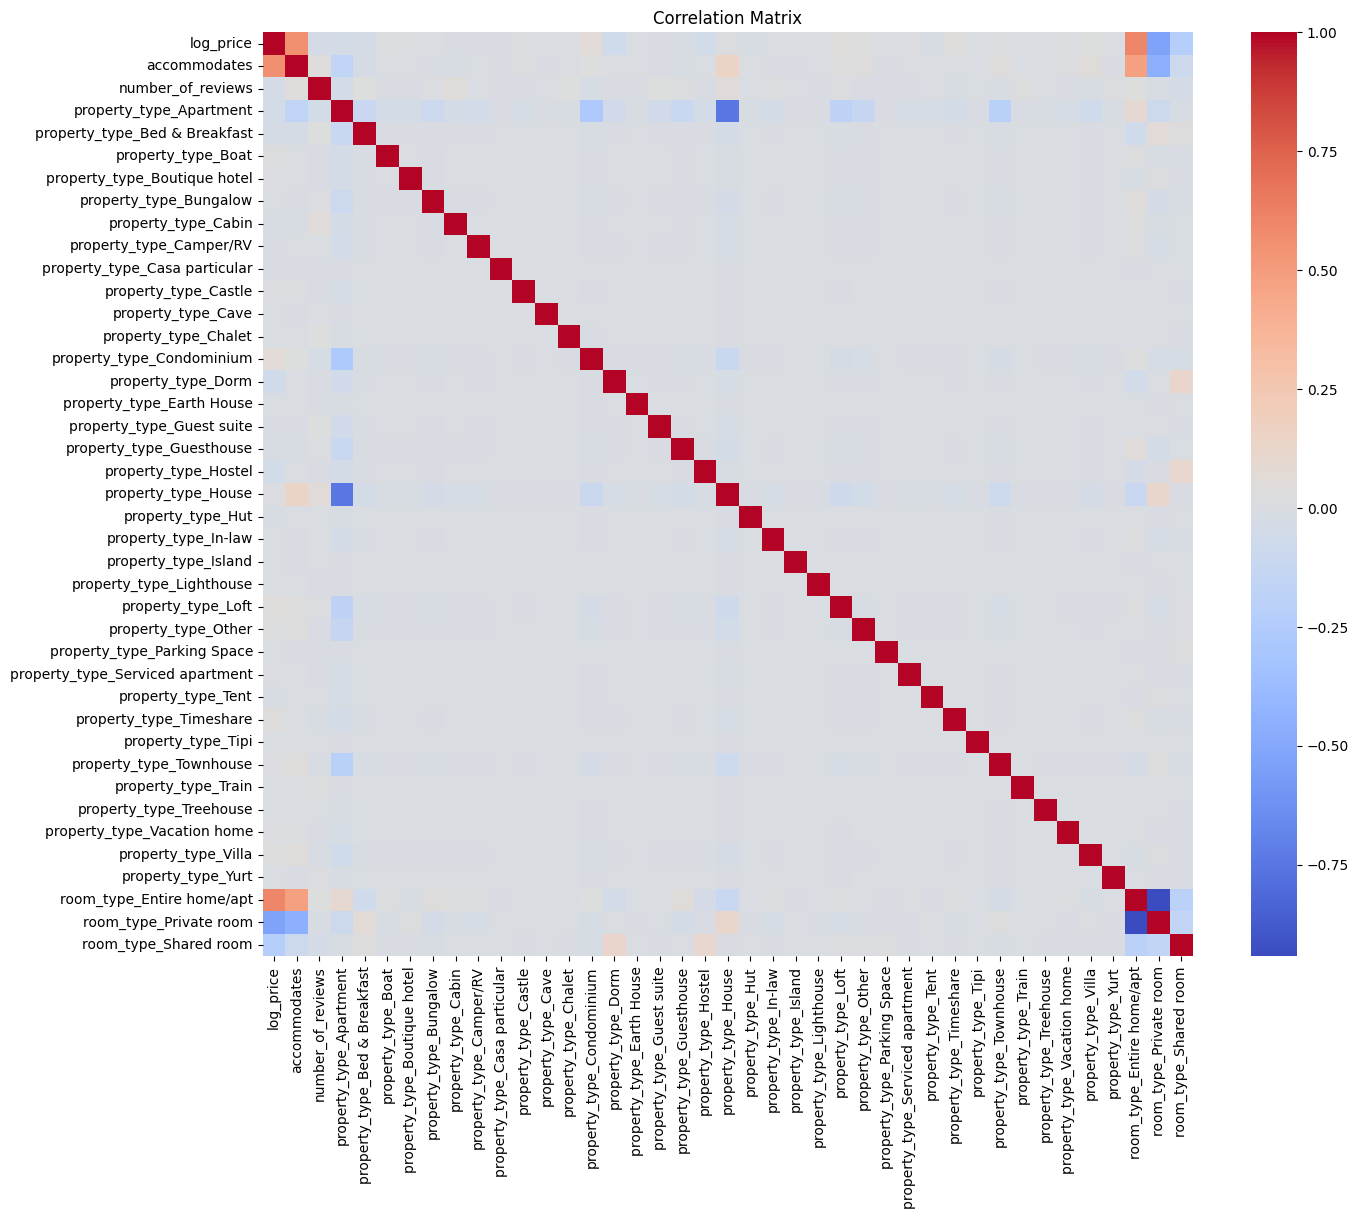

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# Correlation Matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

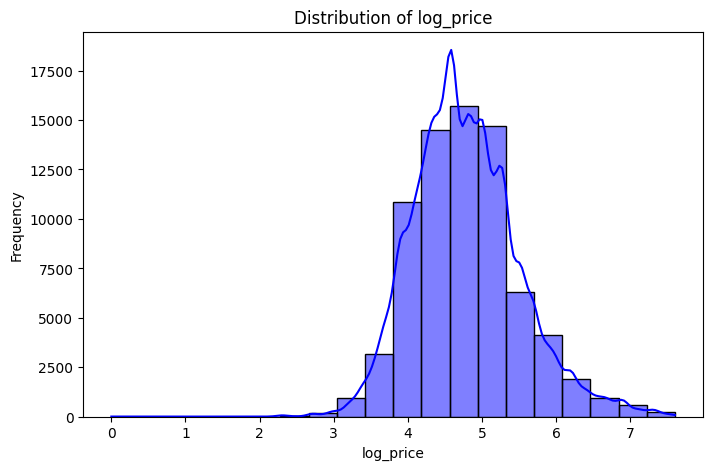

In [12]:
# Histogram for log_price
plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], bins=20, kde=True, color='blue')
plt.title('Distribution of log_price')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()

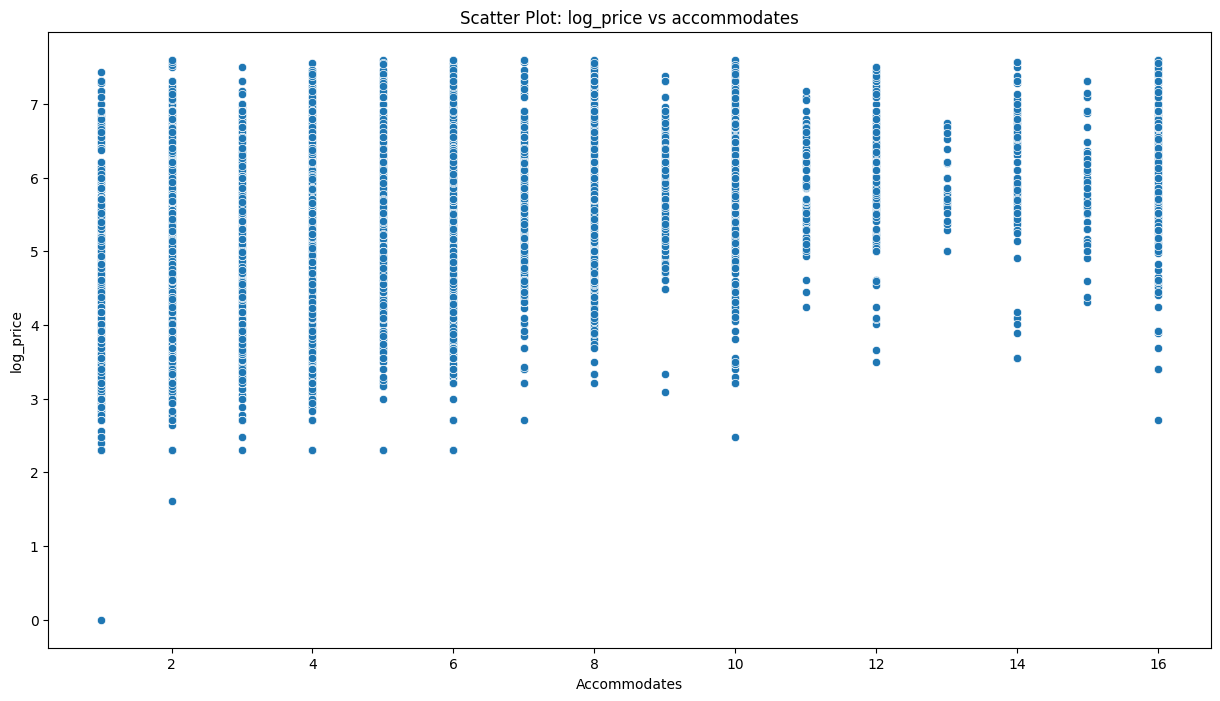

In [13]:
# Scatter Plot between log_price and accommodates
plt.figure(figsize=(15, 8))
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.title('Scatter Plot: log_price vs accommodates')
plt.xlabel('Accommodates')
plt.ylabel('log_price')
plt.show()

## 3.Geospatial Analysis

In [14]:
geo_spatial_df = df[['log_price', 'latitude','longitude', 'neighbourhood']]

geo_spatial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   log_price      74111 non-null  float64
 1   latitude       74111 non-null  float64
 2   longitude      74111 non-null  float64
 3   neighbourhood  67239 non-null  object 
dtypes: float64(3), object(1)
memory usage: 2.3+ MB


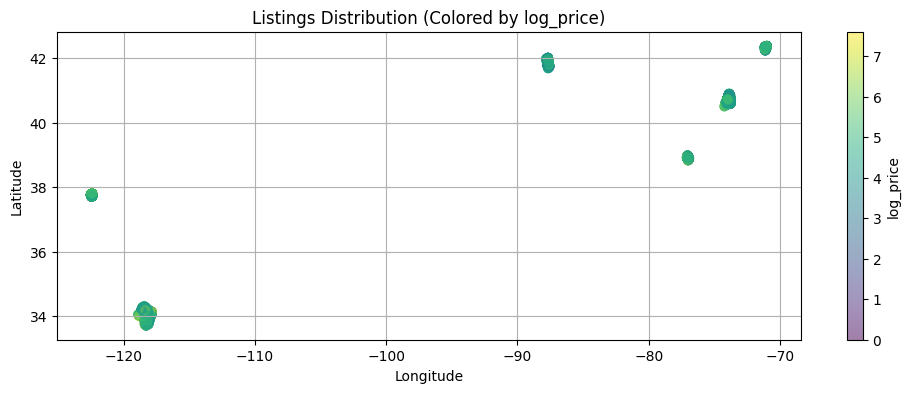

In [15]:
import matplotlib.pyplot as plt

# Filter out rows with missing neighbourhood data
geo_spatial_df_filtered = geo_spatial_df.dropna(subset=['neighbourhood'])

# Filter log_price based on non-null neighbourhood rows
log_price_filtered = df.loc[geo_spatial_df_filtered.index, 'log_price']

# Plot listings on a map colored by log_price
plt.figure(figsize=(12, 4))
plt.scatter(geo_spatial_df_filtered['longitude'], geo_spatial_df_filtered['latitude'], c=log_price_filtered, cmap='viridis', alpha=0.5)
plt.colorbar(label='log_price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Listings Distribution (Colored by log_price)')
plt.grid(True)
plt.show()

## 4.Sentiment Analysis on Textual Data

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Polarity scores of Text

In [17]:
# Function to calculate sentiment scores
def get_sentiment_score(text):
    # Convert to string if not already
    text = str(text)
    # Get sentiment scores
    scores = sid.polarity_scores(text)
    # Return compound score (normalized score between -1 and 1)
    return scores['compound']

# Apply sentiment analysis to the 'description' column
df['sentiment_score'] = df['description'].apply(get_sentiment_score)

### LogPrice vs SentimentScore

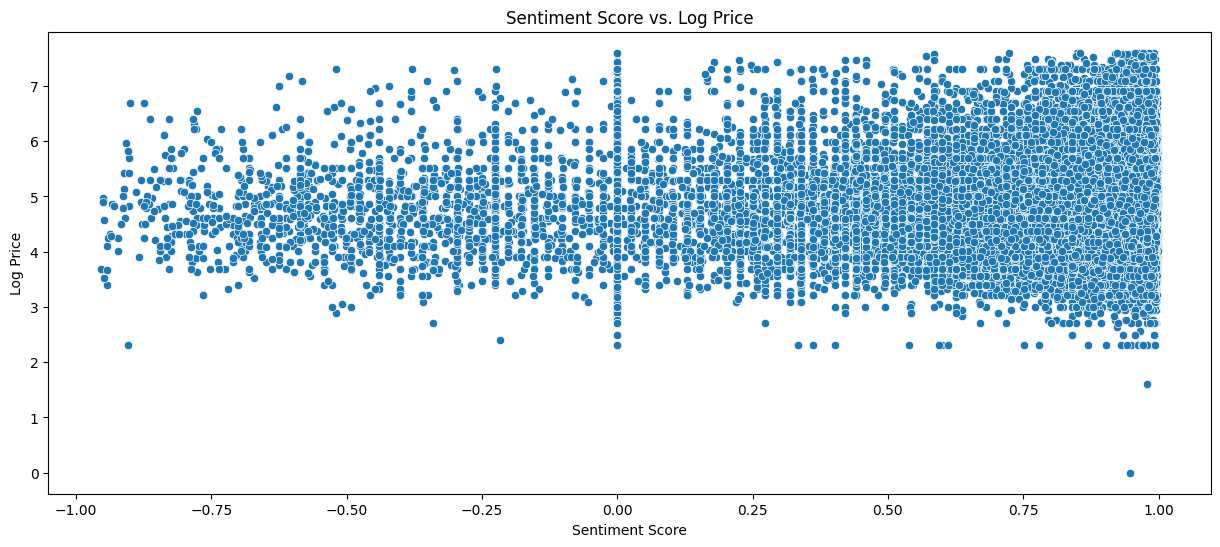

In [18]:
# Check if sentiment score influences listing prices
# For example, you can plot sentiment score against log_price
plt.figure(figsize=(15, 6))
sns.scatterplot(x='sentiment_score', y='log_price', data=df)
plt.title('Sentiment Score vs. Log Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Log Price')
plt.show()

## 5.Aminities Anlaysis

### Parsing

In [19]:
import pandas as pd
from scipy.stats import ttest_ind
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming df contains the DataFrame with the listings data

# Step 1: Parse Amenities
df['amenities'] = df['amenities'].str.replace('"','').str.split("{").str[1].str.rstrip('}').str.split(",")

### Encoding

In [20]:
# Step 2: Encode Amenities
mlb = MultiLabelBinarizer()
amenities_encoded = pd.DataFrame(mlb.fit_transform(df['amenities']), columns=mlb.classes_, index=df.index)
df_encoded = pd.concat([df, amenities_encoded], axis=1)

### Correlation Analysis

In [21]:
# Step 3: Correlation Analysis
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_encoded[numeric_columns].corr()['log_price']

### Statistical Tests

In [22]:
# Step 4: Statistical Tests
significant_amenities = {}
for amenity in amenities_encoded.columns:
    has_amenity = df_encoded[df_encoded[amenity] == 1]['log_price']
    no_amenity = df_encoded[df_encoded[amenity] == 0]['log_price']
    p_value = ttest_ind(has_amenity, no_amenity).pvalue
    if p_value < 0.05:  # assuming significance level of 0.05
        significant_amenities[amenity] = p_value

### Ranking Aminities

In [23]:
# Step 5: Ranking Amenities
significant_amenities = sorted(significant_amenities.items(), key=lambda x: x[1])

In [24]:
significant_amenities

[('Cable TV', 0.0),
 ('Dryer', 0.0),
 ('Family/kid friendly', 0.0),
 ('Indoor fireplace', 0.0),
 ('TV', 0.0),
 ('Washer', 0.0),
 ('translation missing: en.hosting_amenity_49', 0.0),
 ('translation missing: en.hosting_amenity_50', 0.0),
 ('Lock on bedroom door', 4.462584425681297e-295),
 ('Doorman', 2.0199391659412343e-237),
 ('Hair dryer', 3.732055322544811e-226),
 ('Suitable for events', 4.4096517651608607e-219),
 ('Private entrance', 2.3294621265946124e-213),
 ('Gym', 9.70189513411269e-208),
 ('Iron', 2.1002638615937944e-206),
 ('24-hour check-in', 1.2796417810950166e-199),
 ('Heating', 4.838730369663453e-177),
 ('Kitchen', 2.0343103692351268e-167),
 ('Elevator', 2.9872564418075074e-166),
 ('Pets live on this property', 6.426672618066918e-159),
 ('Shampoo', 6.167816365473141e-146),
 ('Internet', 8.700970160971637e-143),
 ('Laptop friendly workspace', 2.014561855190334e-139),
 ('Self Check-In', 3.7639323332264787e-129),
 ('Pets allowed', 4.343662987104084e-115),
 ('Dishwasher', 1.1351

In [25]:
df = pd.concat([df, amenities_encoded], axis=1)
df = df.drop('amenities', axis=1)

## 6.Categorical Data Encoding

In [26]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=['room_type', 'city', 'property_type'])

In [27]:
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(['room_type', 'city', 'property_type'], axis=1)

## 7.Model Development and Training

### Drop Non-Numeric Cols

In [28]:
X = df.drop(columns=['id', 'log_price', 'description', 'name', 'first_review', 'last_review', 'thumbnail_url', 'zipcode', 'neighbourhood'])
y = df['log_price']

In [29]:
# Handle missing values
X.fillna(0, inplace=True)

In [30]:
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_columns]

### Shuffle for LogPrice

In [31]:
# Shuffle the dataset with respect to the log_price column
data = pd.concat([X_numeric, df['log_price']], axis=1)
shuffled_data = data.sample(frac=1, random_state=42)

In [32]:
# Separate features and target variable from the shuffled dataset
X_shuffled = shuffled_data.drop(columns='log_price')
y_shuffled = shuffled_data['log_price']

### Split Data

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

In [35]:
y_train = y_train.loc[:, ~y_train.columns.duplicated()]
y_test = y_test.loc[:, ~y_test.columns.duplicated()]

### Simple Linear Regression

In [36]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
print("Baseline Model MSE:", baseline_mse)

Baseline Model MSE: 0.28542268977550483


### RandomForest

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("RandomForest Model MSE:", rf_mse)

<ipython-input-37-a710ead56be8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


### GradientBoosting

In [ ]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
print("GradientBoosting Model MSE:", gb_mse)

## 8.Model Optimization and Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
# rf_param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }
# rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
# rf_grid_search.fit(X_train, y_train)
# rf_best_model = rf_grid_search.best_estimator_
# rf_pred = rf_best_model.predict(X_test)
# rf_mse = mean_squared_error(y_test, rf_pred)
# print("RandomForest Model MSE:", rf_mse)

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Perform Grid Search with reduced parameters
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                              param_grid=rf_param_grid, cv=2,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)  # Utilize multiple CPU cores
rf_grid_search.fit(X_train, y_train)

# Get the best model and make predictions
rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(X_test)

# Calculate MSE
rf_mse = mean_squared_error(y_test, rf_pred)
print("RandomForest Model MSE:", rf_mse)

In [ ]:
# # GradientBoosting Model
# gb_param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }
# gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
# gb_grid_search.fit(X_train, y_train)
# gb_best_model = gb_grid_search.best_estimator_
# gb_pred = gb_best_model.predict(X_test)
# gb_mse = mean_squared_error(y_test, gb_pred)
# print("GradientBoosting Model MSE:", gb_mse)

In [ ]:
# Define a smaller parameter grid
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Perform Grid Search with reduced parameters
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42),
                              param_grid=gb_param_grid, cv=2,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)  # Utilize multiple CPU cores
gb_grid_search.fit(X_train, y_train)

# Get the best model and make predictions
gb_best_model = gb_grid_search.best_estimator_
gb_pred = gb_best_model.predict(X_test)

# Calculate MSE
gb_mse = mean_squared_error(y_test, gb_pred)
print("GradientBoosting Model MSE:", gb_mse)

## 9.Feature Importance and Model Insights

In [ ]:
import shap
import matplotlib.pyplot as plt

In [ ]:
# Analyze Feature Importance and Model Insights
# RandomForest Feature Importance
rf_feature_importance = rf_best_model.feature_importances_

# Plot RandomForest Feature Importance
plt.figure(figsize=(10, 25))
plt.barh(X_train.columns, rf_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RandomForest Feature Importance')
plt.show()

In [ ]:
# GradientBoosting Feature Importance
gb_feature_importance = gb_best_model.feature_importances_

# Plot GradientBoosting Feature Importance
plt.figure(figsize=(10, 30))
plt.barh(X_train.columns, gb_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('GradientBoosting Feature Importance')
plt.show()

In [ ]:
# SHAP Values (GradientBoosting)
explainer = shap.Explainer(gb_best_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
# Summary Plot
shap.summary_plot(shap_values, X_test)

## 10.Predictive Performance Assessment

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### RMSE for RF model

In [ ]:
# Step 4: Evaluate Performance on Test Set and Residual Analysis
# Calculate RMSE and R-squared for RandomForest Model
rf_test_pred = rf_best_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_r2 = r2_score(y_test, rf_test_pred)
print("RandomForest Model - RMSE:", rf_rmse)
print("RandomForest Model - R-squared:", rf_r2)

### RMSE for GB model

In [ ]:
# Calculate RMSE and R-squared for GradientBoosting Model
gb_test_pred = gb_best_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))
gb_r2 = r2_score(y_test, gb_test_pred)
print("GradientBoosting Model - RMSE:", gb_rmse)
print("GradientBoosting Model - R-squared:", gb_r2)

### Residual Analysis

In [ ]:
# Residual Analysis
import numpy as np

# Convert y_test to a NumPy array and flatten it
y_test = y_test.to_numpy().flatten()

# Reshape rf_test_pred to match the shape of y_test_array
rf_test_pred = rf_test_pred.reshape(-1)

# Residual Analysis
rf_residuals = y_test - rf_test_pred


In [ ]:
# Residual Analysis
import numpy as np

# Convert y_test to a NumPy array and flatten it
# y_test = y_test.to_numpy().flatten()

# Reshape rf_test_pred to match the shape of y_test_array
gb_test_pred = gb_test_pred.reshape(-1)

# Residual Analysis
gb_residuals = y_test - gb_test_pred


### Model Residual Plottings

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))  # Adjusted figure size
plt.scatter(rf_test_pred, rf_residuals, c=rf_test_pred, cmap='viridis', alpha=0.2)
plt.colorbar(label='rf_test_pred')  # Add colorbar to show the mapping
plt.title('RandomForest Residuals')
plt.xlabel('Predicted log_price')
plt.ylabel('Residuals')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))  # Adjusted figure size
plt.scatter(gb_test_pred, gb_residuals, c=gb_test_pred, cmap='viridis', alpha=0.2)
plt.colorbar(label='gb_test_pred')  # Add colorbar to show the mapping
plt.title('GradientBoosting Residuals')
plt.xlabel('Predicted log_price')
plt.ylabel('Residuals')
plt.show()
